In [1]:
from source_functions import *
from estimate_BLP import *
from utils import *

## Load data and set function arguments

In [2]:
df_3p, alphas_3p = load_mat_data('Simulation Data/100markets3products.mat', 3, 100)
df_5p, alphas_5p = load_mat_data('Simulation Data/100markets5products.mat', 5, 100)

sigma_alpha_init = 1.0 #initial guess
df = df_3p #data
alphas = alphas_3p #random coefficients on prices
mode = "demand_side" #demand-side moments only

# Part 1: Create Graphs

In [3]:
# Set true parameter values
beta = (5, 1, 1)
gamma = (2, 1, 1)

#Draw epsilons
epsilons_3p = draw_epsilons(alphas_3p)
epsilons_5p = draw_epsilons(alphas_5p)

# Calculate marginal costs for the firms
df_3p['mc'] = gamma[0] + gamma[1]*df_3p['w'] + gamma[2]*df_3p['Z'] + df_3p['eta']
df_5p['mc'] = gamma[0] + gamma[1]*df_5p['w'] + gamma[2]*df_5p['Z'] + df_5p['eta']

# Calculate profits per purchase for the firms
df_3p['Pi'] = df_3p['P_opt'] - df_3p['mc']
df_5p['Pi'] = df_5p['P_opt'] - df_5p['mc']

# Calculate consumer welfare
consumer_welfare_3p = calculate_welfare(df_3p, alphas_3p, beta, epsilons_3p)
consumer_welfare_5p = calculate_welfare(df_5p, alphas_5p, beta, epsilons_5p)

ValueError: Data must be 1-dimensional, got ndarray of shape (500, 500) instead

Plot prices

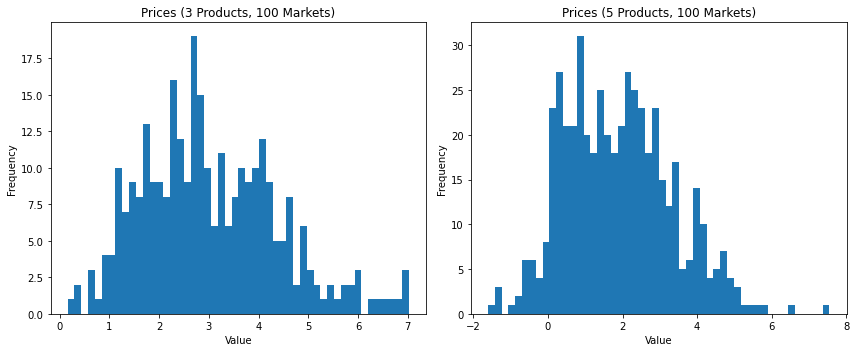

In [7]:
plot_two_histograms(df_3p['P_opt'].values, df_5p['P_opt'].values, bins=50, labels=('Prices (3 Products, 100 Markets)', 'Prices (5 Products, 100 Markets)'))

Plot profits per purchase

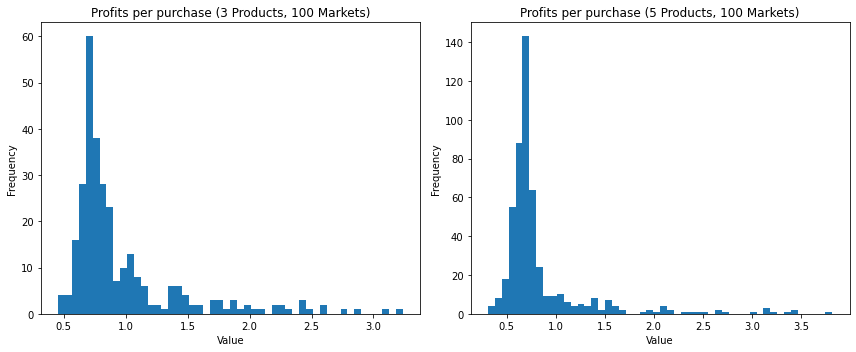

In [8]:
plot_two_histograms(df_3p['Pi'].values, df_5p['Pi'].values, bins=50, labels=('Profits per purchase (3 Products, 100 Markets)', 'Profits per purchase (5 Products, 100 Markets)'))

Plot consumer welfare

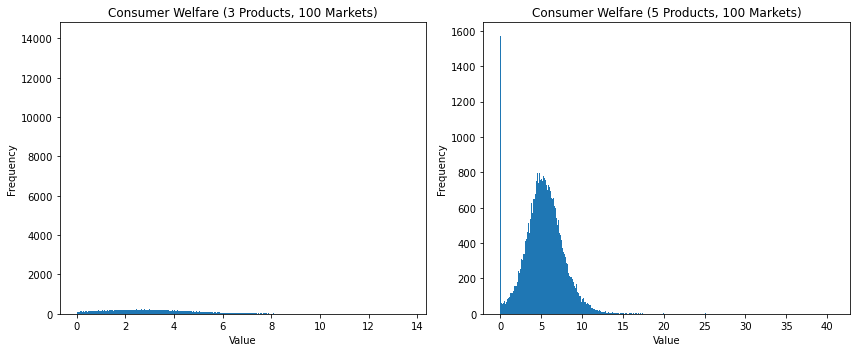

In [9]:
plot_two_histograms(consumer_welfare_3p, consumer_welfare_5p, labels=('Consumer Welfare (3 Products, 100 Markets)', 'Consumer Welfare (5 Products, 100 Markets)'))

# Part 2.1: BLP and Hausman Instruments

In [10]:
# Set the number of firms, markets, and simulated consumers in each market 
J = 3
M = 100
N = 500
# Set the number of BLP instruments
N_instruments = 7

### using X as regressors

In [12]:
df_3p['P_other_markets'] = df_3p.groupby('product_id')['P_opt'].transform(
        lambda x: (x.sum() - x) / (len(x) - 1)
    )
xi = df_3p['xi_all'].values.reshape(J*M, 1)
X = df_3p[['x1', 'x2', 'x3']].values.reshape(J*M, 3)
price = df_3p['P_opt'].values.reshape(J*M, 1)
price_other_mkt = df_3p['P_other_markets'].values.reshape(J*M, 1)

In [13]:
(xi*X).mean(axis=0)

array([0.04346104, 0.02074192, 0.0355315 ])

### Hausman Instruments

In [15]:
(xi*price).mean()

0.2949581371489729

In [16]:
(xi*price_other_mkt).mean()

0.1436795476746802

# Part 2.2: Demand-side estimation, 100 markets

In [54]:
out_demandside = estimate_BLP(df, alphas, sigma_alpha_init, mode, verbose_print = 3, scale_delta_guess = 3)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +7.0000e+00 | 1.00e+00 | 2.32e-04 | 1.00e+00 | 1.00e+00 |   0   |
|   2   |   2   |   1   | +3.5180e+00 | 5.60e+00 | 1.54e-04 | 7.09e-01 | 1.00e+00 |   1   |
|   3   |   3   |   2   | +1.5079e-02 | 3.14e+01 | 6.02e-06 | 3.48e-01 | 1.74e+01 |   1   |
|   4   |   4   |   3   | +4.7132e-01 | 1.24e+02 | 1.84e-03 | 5.87e-02 | 2.92e+02 |   1   |
|   5   |   5   |   4   | +3.3628e-01 | 1.24e+02 | 1.91e-03 | 1.98e-02 | 2.92e+02 |   1   |
|   6   |   6   |   5   | +1.9478e-01 | 1.24e+02 | 1.49e-03 | 6.21e-03 | 4.33e+02 |   1   |
|   7   |   7   |   6   | +1.0641e-01 | 1.24e+02 | 1.09e-03 | 1.

In [109]:
store_results(out_demandside, "Results/q2_demandside_100markets.xlsx")
store_results(out_demandside, "Results/q2_demandside_100markets.tex")
save_mc_to_excel(out_demandside, file_name="Results/q2_demandside_100markets_profits.xlsx", mode = "profits")

Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
Excel file saved to Results/q2_demandside_100markets.xlsx
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
TeX file saved to Results/q2_demandside_100markets.tex
Comparison file saved to Results/q2_demandside_100markets_profits.xlsx.


# Part 2.2g: Demand-side instruments, 10 markets
Load the data and set function arguments:

In [57]:
df_3p10m, alphas_3p10m = load_mat_data('Simulation Data/10markets3products.mat', 3, 10)
#### Function arguments
mode = "demand_side" #demand-side moments only

In [58]:
out_demandside_10m=estimate_BLP(df_3p10m, alphas_3p10m, sigma_alpha_init, mode, verbose_print = 1, scale_delta_guess = 3, max_iter=10000)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
The maximum number of function evaluations is exceeded.
Number of iterations: 10000, function evaluations: 10000, CG iterations: 9999, optimality: 5.78e-05, constraint violation: 5.64e-12, execution time: 1.1e+02 s.
Optimization failed: The maximum number of function evaluations is exceeded.
#============================================================================#
#== Optimal parameters found. Next, calculating standard errors:
#== Calculating standard errors, elasticities, profits, and consumer surplus
#============================================================================#
#============================================================================#
#== BLP Estimation Complete
#============================================================================#


In [59]:
store_results(out_demandside_10m, "Results/q2_demandside_10markets_delta_equals_3.xlsx")
store_results(out_demandside_10m, "Results/q2_demandside_10markets_delta_equals_3.tex")

Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_3.xlsx
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_3.tex
TeX file s

In [60]:
out_demandside_10m_v2=estimate_BLP(df_3p10m, alphas_3p10m, sigma_alpha_init, mode, verbose_print = 1, scale_delta_guess = 1, max_iter=10000)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
The maximum number of function evaluations is exceeded.
Number of iterations: 10000, function evaluations: 10000, CG iterations: 9999, optimality: 4.67e-05, constraint violation: 1.01e-11, execution time: 1.1e+02 s.
Optimization failed: The maximum number of function evaluations is exceeded.
#============================================================================#
#== Optimal parameters found. Next, calculating standard errors:
#== Calculating standard errors, elasticities, profits, and consumer surplus
#============================================================================#
#============================================================================#
#== BLP Estimation Complete
#============================================================================#


In [61]:
store_results(out_demandside_10m_v2, "Results/q2_demandside_10markets_delta_equals_1.xlsx")
store_results(out_demandside_10m_v2, "Results/q2_demandside_10markets_delta_equals_1.tex")

Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_10markets_delta_equals_1.xlsx
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_10markets_delta_equals_1.tex
TeX file s

# Part 2.3: Using price as a moment. 

Estimate $\theta$ assming incorrectly that $E[\xi|p]=0$ within each market. 

Load the data and set function arguments:

In [63]:
out_demandside_pmoment_delta1 = estimate_BLP(df, alphas, sigma_alpha_init, "p_exercise", verbose_print = 1, scale_delta_guess = 1, max_iter=10000)
out_demandside_pmoment_delta3 = estimate_BLP(df, alphas, sigma_alpha_init, "p_exercise", verbose_print = 1, scale_delta_guess = 3, max_iter=10000)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
`xtol` termination condition is satisfied.
Number of iterations: 96, function evaluations: 81, CG iterations: 0, optimality: 3.14e-31, constraint violation: 1.11e-16, execution time: 2.3e+01 s.
Optimal solution found.
#============================================================================#
#== Optimal parameters found. Next, calculating standard errors:
#== Calculating standard errors, elasticities, profits, and consumer surplus
#============================================================================#
#============================================================================#
#== BLP Estimation Complete
#============================================================================#
#============================================================================#
#== Solving the M

In [64]:
store_results(out_demandside_pmoment_delta1, "Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx")
store_results(out_demandside_pmoment_delta1, "Results/q2_demandside_pmoment_100markets_delta_equals_1.tex")
store_results(out_demandside_pmoment_delta3, "Results/q2_demandside_pmoment_100markets_delta_equals_3.xlsx")
store_results(out_demandside_pmoment_delta3, "Results/q2_demandside_pmoment_100markets_delta_equals_3.tex")

Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
Excel file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.xlsx
TeX file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_pmoment_100markets_delta_equals_1.tex
TeX file saved to Results/q2_demandside_

# Part 3.1: Using the cost shifter as a moment

Estimate assuming  $E[\xi|X, w^\text{cost}]=0$. 

Load the data and set function arguments:

In [66]:
out_demandside_wcost = estimate_BLP(df, alphas, sigma_alpha_init, "supply_W", verbose_print=1)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
`xtol` termination condition is satisfied.
Number of iterations: 6144, function evaluations: 6123, CG iterations: 6088, optimality: 5.35e-14, constraint violation: 1.67e-16, execution time: 1.7e+03 s.
Optimal solution found.
#============================================================================#
#== Optimal parameters found. Next, calculating standard errors:
#== Calculating standard errors, elasticities, profits, and consumer surplus
#============================================================================#
#============================================================================#
#== BLP Estimation Complete
#============================================================================#


In [107]:
store_results(out_demandside_wcost, "Results/q3_demandside_wcost_100markets.xlsx")
store_results(out_demandside_wcost, "Results/q3_demandside_wcost_100markets.tex")

save_mc_to_excel(out_demandside_wcost, file_name="Results/q3_demandside_wcost_100markets_profits.xlsx", mode = "profits")

Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
Excel file saved to Results/q3_demandside_wcost_100markets.xlsx
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex
TeX file saved to Results/q3_demandside_wcost_100markets.tex


In [68]:
out_demandside_wcost_10m = estimate_BLP(df_3p10m, alphas_3p10m, sigma_alpha_init, "supply_W", scale_delta_guess=3, verbose_print=1)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
The maximum number of function evaluations is exceeded.
Number of iterations: 10000, function evaluations: 10000, CG iterations: 9999, optimality: 9.15e-05, constraint violation: 1.34e-11, execution time: 1.1e+02 s.
Optimization failed: The maximum number of function evaluations is exceeded.
#============================================================================#
#== Optimal parameters found. Next, calculating standard errors:
#== Calculating standard errors, elasticities, profits, and consumer surplus
#============================================================================#
#============================================================================#
#== BLP Estimation Complete
#============================================================================#


In [69]:
store_results(out_demandside_wcost_10m, "Results/q3_demandside_wcost_10markets.xlsx")
store_results(out_demandside_wcost_10m, "Results/q3_demandside_wcost_10markets.tex")

Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
Excel file saved to Results/q3_demandside_wcost_10markets.xlsx
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex
TeX file saved to Results/q3_demandside_wcost_10markets.tex


# Joint estimation
Oligopoly (true) case

In [71]:
out_joint_oligopoly = estimate_BLP(df, alphas, sigma_alpha_init, "supply_joint", verbose_print=3, scale_delta_guess=3)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +1.1000e+01 | 1.00e+00 | 2.38e-04 | 1.00e+00 | 1.00e+00 |   0   |
|   2   |   2   |   1   | +6.4314e+00 | 5.60e+00 | 1.72e-04 | 7.65e-01 | 1.00e+00 |   1   |
|   3   |   3   |   2   | +1.2285e-02 | 3.92e+01 | 1.30e-05 | 3.56e-01 | 1.00e+00 |   2   |
|   4   |   4   |   3   | +3.7101e-01 | 2.74e+02 | 1.81e-03 | 1.11e-01 | 4.75e+00 |   2   |
|   5   |   5   |   4   | +3.7101e-01 | 2.74e+01 | 1.81e-03 | 1.11e-01 | 4.75e+00 |   1   |
|   6   |   6   |   5   | +5.3890e-02 | 2.74e+01 | 2.22e-04 | 6.07e-02 | 4.75e+00 |   1   |
|   7   |   7   |   6   | +3.6057e-02 | 2.74e+01 | 1.41e-04 | 8.

In [72]:
store_results(out_joint_oligopoly, "Results/q3_joint_oligopoly_100markets.xlsx")
store_results(out_joint_oligopoly, "Results/q3_joint_oligopoly_100markets.tex")

save_mc_to_excel(out_joint_oligopoly, file_name="Results/q3_mc_oligopoly.xlsx")

Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
Excel file saved to Results/q3_joint_oligopoly_100markets.xlsx
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
TeX file saved to Results/q3_joint_oligopoly_100markets.tex
Comparison file 

Collusion case

In [74]:
out_joint_collusion = estimate_BLP(df, alphas, sigma_alpha_init, "supply_joint", conduct = "collusion", verbose_print=3, scale_delta_guess=3)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +1.1000e+01 | 1.00e+00 | 2.38e-04 | 1.00e+00 | 1.00e+00 |   0   |
|   2   |   2   |   1   | +6.4314e+00 | 5.60e+00 | 1.72e-04 | 7.65e-01 | 1.00e+00 |   1   |
|   3   |   3   |   2   | +1.2285e-02 | 3.92e+01 | 1.30e-05 | 3.56e-01 | 1.00e+00 |   2   |
|   4   |   4   |   3   | +3.7101e-01 | 2.74e+02 | 1.81e-03 | 1.11e-01 | 4.75e+00 |   2   |
|   5   |   5   |   4   | +3.7101e-01 | 2.74e+01 | 1.81e-03 | 1.11e-01 | 4.75e+00 |   1   |
|   6   |   6   |   5   | +5.3890e-02 | 2.74e+01 | 2.22e-04 | 6.07e-02 | 4.75e+00 |   1   |
|   7   |   7   |   6   | +3.6057e-02 | 2.74e+01 | 1.41e-04 | 8.

In [75]:
store_results(out_joint_collusion, "Results/q3_joint_collusion_100markets.xlsx")
store_results(out_joint_collusion, "Results/q3_joint_collusion_100markets.tex")

save_mc_to_excel(out_joint_collusion, file_name="Results/q3_mc_collusion.xlsx")

Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
Excel file saved to Results/q3_joint_collusion_100markets.xlsx
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
TeX file saved to Results/q3_joint_collusion_100markets.tex
Comparison file 

In [76]:
out_joint_perfect = estimate_BLP(df, alphas, sigma_alpha_init, "supply_joint", conduct = "perfect", verbose_print=3, scale_delta_guess=3)

#============================================================================#
#== Solving the MPEC optimization routine
#============================================================================#
| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  | penalty  |CG stop|
|-------|-------|-------|-------------|----------|----------|----------|----------|-------|
|   1   |   1   |   0   | +1.1000e+01 | 1.00e+00 | 2.38e-04 | 1.00e+00 | 1.00e+00 |   0   |
|   2   |   2   |   1   | +6.4314e+00 | 5.60e+00 | 1.72e-04 | 7.65e-01 | 1.00e+00 |   1   |
|   3   |   3   |   2   | +1.1978e-02 | 3.14e+01 | 1.16e-05 | 3.57e-01 | 6.76e+00 |   1   |
|   4   |   4   |   3   | +5.0880e-01 | 1.26e+02 | 1.93e-03 | 6.09e-02 | 6.76e+00 |   1   |
|   5   |   5   |   4   | +3.7363e-01 | 1.26e+02 | 2.04e-03 | 2.06e-02 | 1.89e+02 |   1   |
|   6   |   6   |   5   | +2.2763e-01 | 1.26e+02 | 1.63e-03 | 6.47e-03 | 3.35e+02 |   1   |
|   7   |   7   |   6   | +1.3119e-01 | 1.26e+02 | 1.24e-03 | 1.

In [77]:
store_results(out_joint_perfect, "Results/q3_joint_perfect_100markets.xlsx")
store_results(out_joint_perfect, "Results/q3_joint_perfect_100markets.tex")

save_mc_to_excel(out_joint_perfect, file_name="Results/q3_mc_perfect.xlsx")

Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
Excel file saved to Results/q3_joint_perfect_100markets.xlsx
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
TeX file saved to Results/q3_joint_perfect_100markets.tex
Comparison file saved to Results/q3_mc_perfect.x